In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
from water_pollution.api import ann_utils as util
from water_pollution.api import ann_api as api

from tensorflow.keras import models
from sklearn.externals import joblib

from fastapi import FastAPI
import requests

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

import pandas as pd
import numpy as np

from dotenv import load_dotenv
import os

from matplotlib import pyplot as plt

In [55]:
util.get_stations_df().sort_values('alt',ascending=False)

,label,alt,river_id,river_label,coord,mean_nitrate
id,,,,,,
6000990,BELRUPT,292,U---0000,La Saône,"(48.090273327987276, 6.101940890815991)",4.513699
6000998,MONTHUREUX-SUR-SAONE 2,241,U---0000,La Saône,"(48.01825125838868, 5.941492053405311)",6.428571
6000993,JONVELLE,230,U---0000,La Saône,"(47.93638044949666, 5.923536232871648)",9.433333
6001000,CENDRECOURT,213,U---0000,La Saône,"(47.84026083741255, 5.917378095285407)",9.233333
6003600,SCEY-SUR-SAONE-ET-ST-ALBI,210,U---0000,La Saône,"(47.661731120409826, 5.972459738821173)",8.421519
6002500,PORT-SUR-SAONE,208,U---0000,La Saône,"(47.69107833426886, 6.039291564176292)",7.489474
6005500,APREMONT 1,190,U---0000,La Saône,"(47.39571566626848, 5.544088676925676)",10.553020
6011000,AUXONNE 1,185,U---0000,La Saône,"(47.194519280308995, 5.382571963766932)",10.828667
6017050,CHARREY-SUR-SAONE,180,U---0000,La Saône,"(47.07369860831355, 5.165636185828038)",10.831410


In [62]:
preddf = util.get_station_weather_prediction_df(6059500)

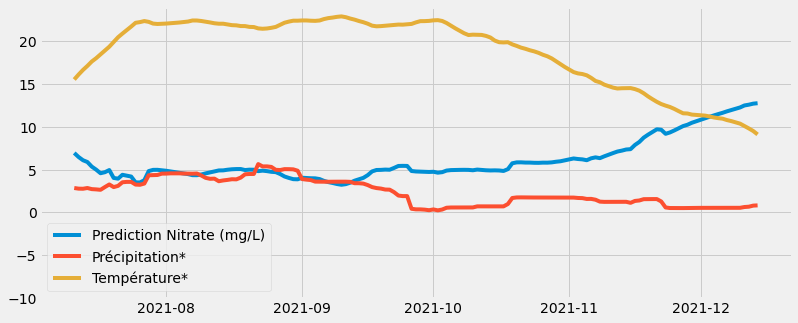

In [60]:
with plt.style.context('fivethirtyeight'):
    
    plt.figure(figsize=(12,5))
    plt.plot(preddf.index,preddf.prediction,label='Prediction Nitrate (mg/L)')
    plt.plot(preddf.index,preddf.precipitation,label='Précipitation*')
    plt.plot(preddf.index,preddf.temp,label='Température*')
    plt.legend()
    plt.ylim(bottom=-10)
    plt.show()


In [51]:
preddf

,precipitation,temp,mean_station,sin_doy,cos_doy,prediction
date,,,,,,
2021-07-11,6.688571,14.1725,10.55302,-0.145799,-0.989314,12.879960
2021-07-12,6.242857,14.7050,10.55302,-0.162807,-0.986658,12.830520
2021-07-13,6.285714,15.0875,10.55302,-0.179767,-0.983709,12.759566
2021-07-14,6.674286,15.4575,10.55302,-0.196673,-0.980469,12.661122
2021-07-15,6.671429,15.8425,10.55302,-0.213521,-0.976938,12.551358
...,...,...,...,...,...,...
2021-12-10,0.680000,8.5425,10.55302,-0.369725,0.929141,13.587506
2021-12-11,0.674286,8.3200,10.55302,-0.353676,0.935368,13.770227
2021-12-12,0.742857,8.0925,10.55302,-0.337523,0.941317,14.030843
